In [1]:
# random seed
NNumber = 11375906

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

file_path = r'C:\Users\YHD\Documents\PycharmProjects\DS Prj\spotify52kData.csv'
df = pd.read_csv(file_path)

In [3]:
num_rows = df.shape[0]
print("The total number of rows in the dataset is：", num_rows)

has_nan = df.isna().any().any()
print("Whether the entire data set contains NaN values:", has_nan)

数据集的总行数是： 52000
整个数据集是否含有NaN值: False


In [4]:
#--------------------------------------Start of Question 2------------------------------------------

In [5]:
true_false_counts = df.iloc[:, 6].value_counts()
print(true_false_counts)

explicit
False    46403
True      5597
Name: count, dtype: int64


In [6]:
# Divide songs into two groups: E and non-E
explicit_songs = df[df['explicit'] == True]['popularity']
non_explicit_songs = df[df['explicit'] == False]['popularity']

In [7]:
from scipy.stats import levene

# Levene test
statistic, p_value = levene(explicit_songs, non_explicit_songs)

print("Levene test result:")
print(f"Test Statistic: {statistic}")
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("The variances of the two sets of data are significantly different")
else:
    print("The variances of the two sets of data are similar")

Levene检验结果:
统计量 (Test Statistic): 16.619770656885425
p值 (p-value): 4.574027876730567e-05
两组数据的方差显著不同


In [8]:
from scipy.stats import mannwhitneyu


u_test_results = []

np.random.seed(NNumber)
random_seeds = np.random.randint(0, len(explicit_songs) , 1000)

# Perform 1000 down sampling and U tests
for seed in random_seeds:
    # Set a random seed for this iteration
    np.random.seed(seed)

    # Randomly sample from E songs, the same number as non-E songs
    down_sampled_non_explicit = non_explicit_songs.sample(n=len(explicit_songs), replace=False)

    # Perform Mann-Whitney U test
    u_stat, p_val = mannwhitneyu(explicit_songs, down_sampled_non_explicit)

    # Save U-statistics and p-values
    u_test_results.append((u_stat, p_val))

# Calculate the average U statistic and average p value of 1000 tests
average_u_stat = np.mean([result[0] for result in u_test_results])
average_p_val = np.mean([result[1] for result in u_test_results])

print(f"Average U statistic: {average_u_stat}")
print(f"Average p-value: {average_p_val}")

Average U statistic: 16806045.6165
Average p-value: 8.45389168647445e-09


In [10]:
#--------------------------------------End of Q2, Start of Q6---------------------------------------

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# Standardized data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_features)

# K-means clustering
kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(principal_components)

# Add clustering results to original data frame
df['cluster'] = clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


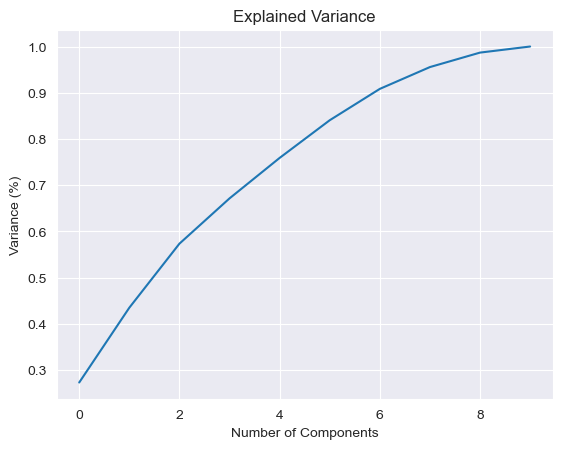

In [12]:
# Assuming you have already run PCA
pca = PCA().fit(scaled_features)

# Draw cumulative variance curve
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.grid(True)
plt.show()

In [13]:
# 3 meaningful principal components

In [14]:
# PCA
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_features)

# Get the proportion of explained variance
explained_var_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance of each principal component
cumulative_var_ratio = explained_var_ratio.cumsum()

# Print the proportion of explained variance and cumulative variance of each principal component
for idx, (var_ratio, cum_var_ratio) in enumerate(zip(explained_var_ratio, cumulative_var_ratio)):
    print(f"Principal Component {idx+1}:")
    print(f"  - Explained Variance Ratio: {var_ratio:.4f}")
    print(f"  - Cumulative Variance Ratio: {cum_var_ratio:.4f}\n")


print(f"Total variance explained by the selected components: {cumulative_var_ratio[-1]:.4f}")

Principal Component 1:
  - Explained Variance Ratio: 0.2734
  - Cumulative Variance Ratio: 0.2734

Principal Component 2:
  - Explained Variance Ratio: 0.1617
  - Cumulative Variance Ratio: 0.4351

Principal Component 3:
  - Explained Variance Ratio: 0.1385
  - Cumulative Variance Ratio: 0.5736

Principal Component 4:
  - Explained Variance Ratio: 0.0980
  - Cumulative Variance Ratio: 0.6715

Principal Component 5:
  - Explained Variance Ratio: 0.0875
  - Cumulative Variance Ratio: 0.7591

Principal Component 6:
  - Explained Variance Ratio: 0.0815
  - Cumulative Variance Ratio: 0.8405

Principal Component 7:
  - Explained Variance Ratio: 0.0678
  - Cumulative Variance Ratio: 0.9084

Principal Component 8:
  - Explained Variance Ratio: 0.0472
  - Cumulative Variance Ratio: 0.9555

Total variance explained by the selected components: 0.9555


In [15]:
# 3 of these principal components account for 57.36% of the variance.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different number of clusters from 2 to 20
silhouette_scores = []
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=NNumber)
    clusters = kmeans.fit_predict(principal_components)

    # Calculate silhouette coefficient
    score = silhouette_score(principal_components, clusters)
    silhouette_scores.append((n_clusters, score))

# Find the number of clusters with the highest silhouette coefficient
best_n_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
best_score = max(silhouette_scores, key=lambda x: x[1])[1]

print(f"Best number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_score}")
# Takes ~6 min

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Best number of clusters: 2
Best silhouette score: 0.27576905216893755


In [17]:
# cant reasonably correspond to the genre labels in column 20 of the data 

In [18]:
# -----------------------------------End of Q6 Start of Q8------------------------------------------

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]  # 特征数据
y = df['track_genre']

# Feature scaling and standardization using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Partition the data set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=NNumber)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=NNumber)

# Training model
clf.fit(X_train, y_train)

# Predict test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.36506410256410254


In [20]:
# 10 times 30.41%, 100 times 35.78%, 1000 times 36.50%
# 100 times has the best balance between time and effect, and there will not be much improvement when the number is increased.